In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 160

sns.set_palette('deep')
sns.set_style('darkgrid')

## Settings

In [18]:
PORTALS = {
    'data.gov.uk': {
        'url': 'https://ckan.publishing.service.gov.uk/api/3',
        'theme-field': 'theme-primary'
    },
    'dummy': {
        'url': 'https://ckan.publishing.service.gov.uk/api/3',
        'theme-field': 'theme-primary'
    }
}

## Helper functions

In [19]:
def do_get(url):
    if not url:
        return None
    
    r = requests.get(url)
    
    if r.status_code != requests.codes.ok:
        r.raise_for_status()
        
    return r.json()

In [67]:
def get_extensions(portal):
    """Returns a dictionary of the extensions used in the portal."""
    if not portal:
        return None
    
    url = '{}/action/status_show'.format(portal)
    data = do_get(url)
    
    if not data:
        return None
    
    data = data['result']['extensions']
    
    return {
        k: 1 for k in data
    }

In [21]:
def get_tags(portal):
    """Returns a dictionary of the tags used in the portal. The tags are sorted alphabetically."""
    if not portal:
        return None
    
    url = '{}/action/package_search?facet.field=["tags"]&facet.limit=-1&facet.mincount=2'.format(portal)
    data = do_get(url)
    
    if not data:
        return None
    
    data = data['result']['facets']['tags']
    data = dict(sorted(data.items(), key=lambda t: t[0].lower()))
        
    return data

In [71]:
def get_themes(portal, theme_field):
    """Returns a dictionary of the themes used in the portal. The themes are sorted alphabetically."""
    if not portal:
        return None
    
    url = '{}/action/package_search?facet.field=["{}"]&facet.limit=-1'.format(portal, theme_field)
    data = do_get(url)
    
    if not data:
        return None
        
    data = data['result']['facets'][theme_field]
    data = dict(sorted(data.items(), key=lambda t: t[0].lower()))
        
    return data

In [72]:
def add_dict_to_df(df, data, index):
    """Adds a dictionary to a pandas dataframe."""
    return df.append(pd.DataFrame([data], index=[index]), sort=False)

## Harvest data from the portals
### Extensions

In [73]:
exts_df = pd.DataFrame()

for k in PORTALS.keys():
    portal = PORTALS[k]
    
    exts = get_extensions(portal['url'])
    exts[k] = k
    
    exts_df = add_dict_to_df(exts_df, exts, k)
    
exts_df = exts_df.transpose()
exts_df = exts_df.drop(PORTALS.keys())

### Tags

In [76]:
tags_df = pd.DataFrame()

for k in PORTALS.keys():
    portal = PORTALS[k]
    
    tags = get_tags(portal['url'])
    tags[k] = k
    
    tags_df = add_dict_to_df(tags_df, tags, k)
    
tags_df = tags_df.transpose()
tags_df = tags_df.drop(PORTALS.keys())

### Themes

In [79]:
themes_df = pd.DataFrame()

for k in PORTALS.keys():
    portal = PORTALS[k]
    
    themes = get_themes(portal['url'], portal['theme-field'])
    themes[k] = k
    
    themes_df = add_dict_to_df(themes_df, themes, k)
    
themes_df = themes_df.transpose()
themes_df = themes_df.drop(PORTALS.keys())

## Visualise
### Extensions

In [74]:
exts_df.describe()

,data.gov.uk,dummy
count,16,16
unique,1,1
top,1,1
freq,16,16


In [75]:
exts_df.head()

,data.gov.uk,dummy
ckan_harvester,1,1
csw_harvester,1,1
datagovsg_s3_resources,1,1
datagovuk,1,1
datagovuk_publisher_form,1,1


In [82]:
exts_df.plot.scatter(x='data.gov.uk', y='dummy', title='Extensions by portal')

ValueError: scatter requires x column to be numeric

### Tags

In [78]:
tags_df.describe()

,data.gov.uk,dummy
count,1760,1760
unique,91,91
top,2,2
freq,532,532


In [77]:
tags_df.head()

,data.gov.uk,dummy
1200c,2,2
1991,2,2
2001,40,40
2001 census,2,2
2003,4,4


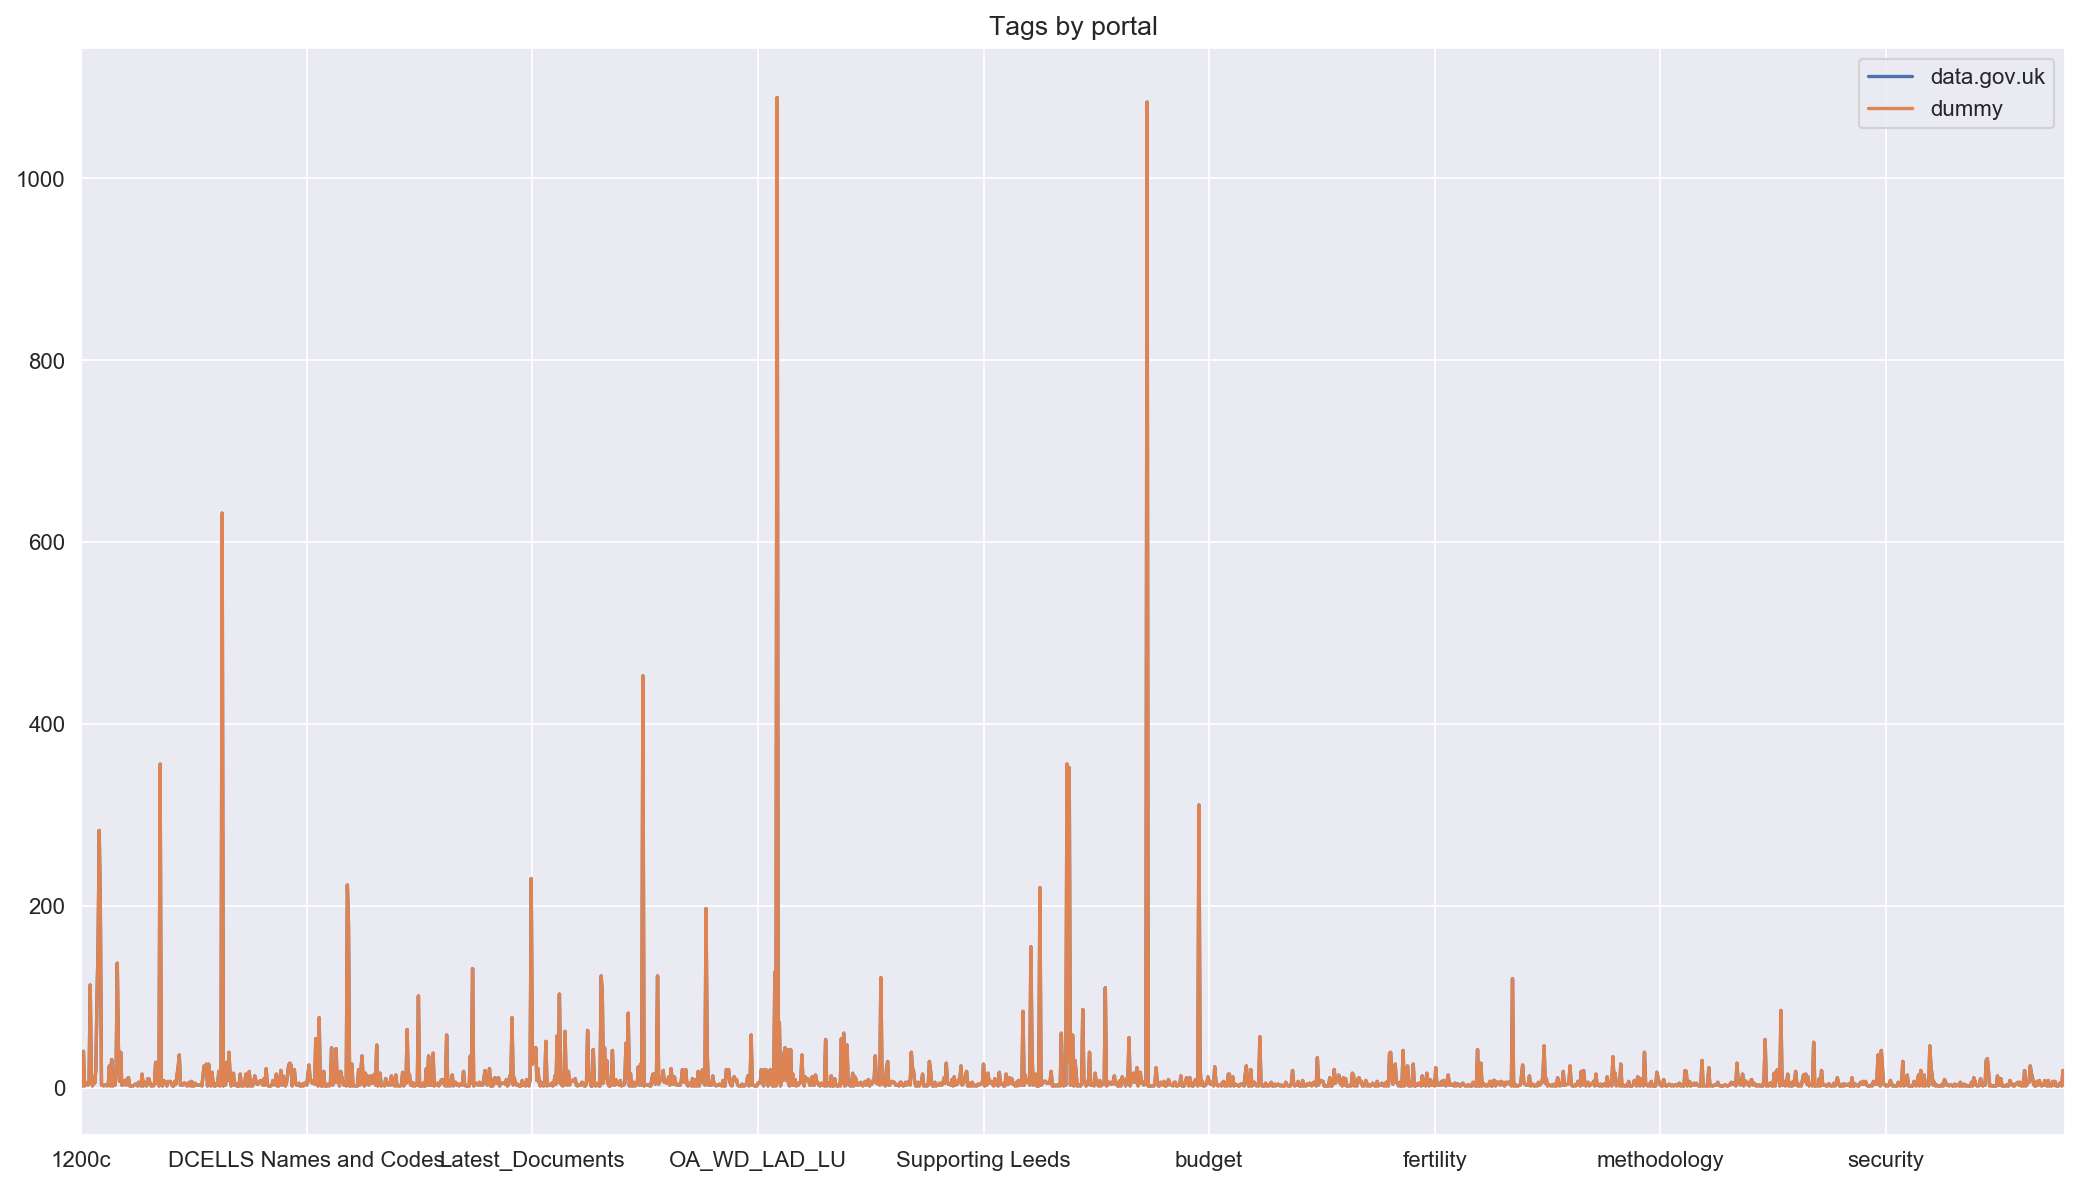

In [29]:
tags_df.plot(title='Tags by portal')

### Themes

In [80]:
themes_df.describe()

,data.gov.uk,dummy
count,12,12
unique,12,12
top,7601,7601
freq,1,1


In [81]:
themes_df.head()

,data.gov.uk,dummy
business-and-economy,1093,1093
crime-and-justice,705,705
defence,187,187
education,1250,1250
environment,12683,12683


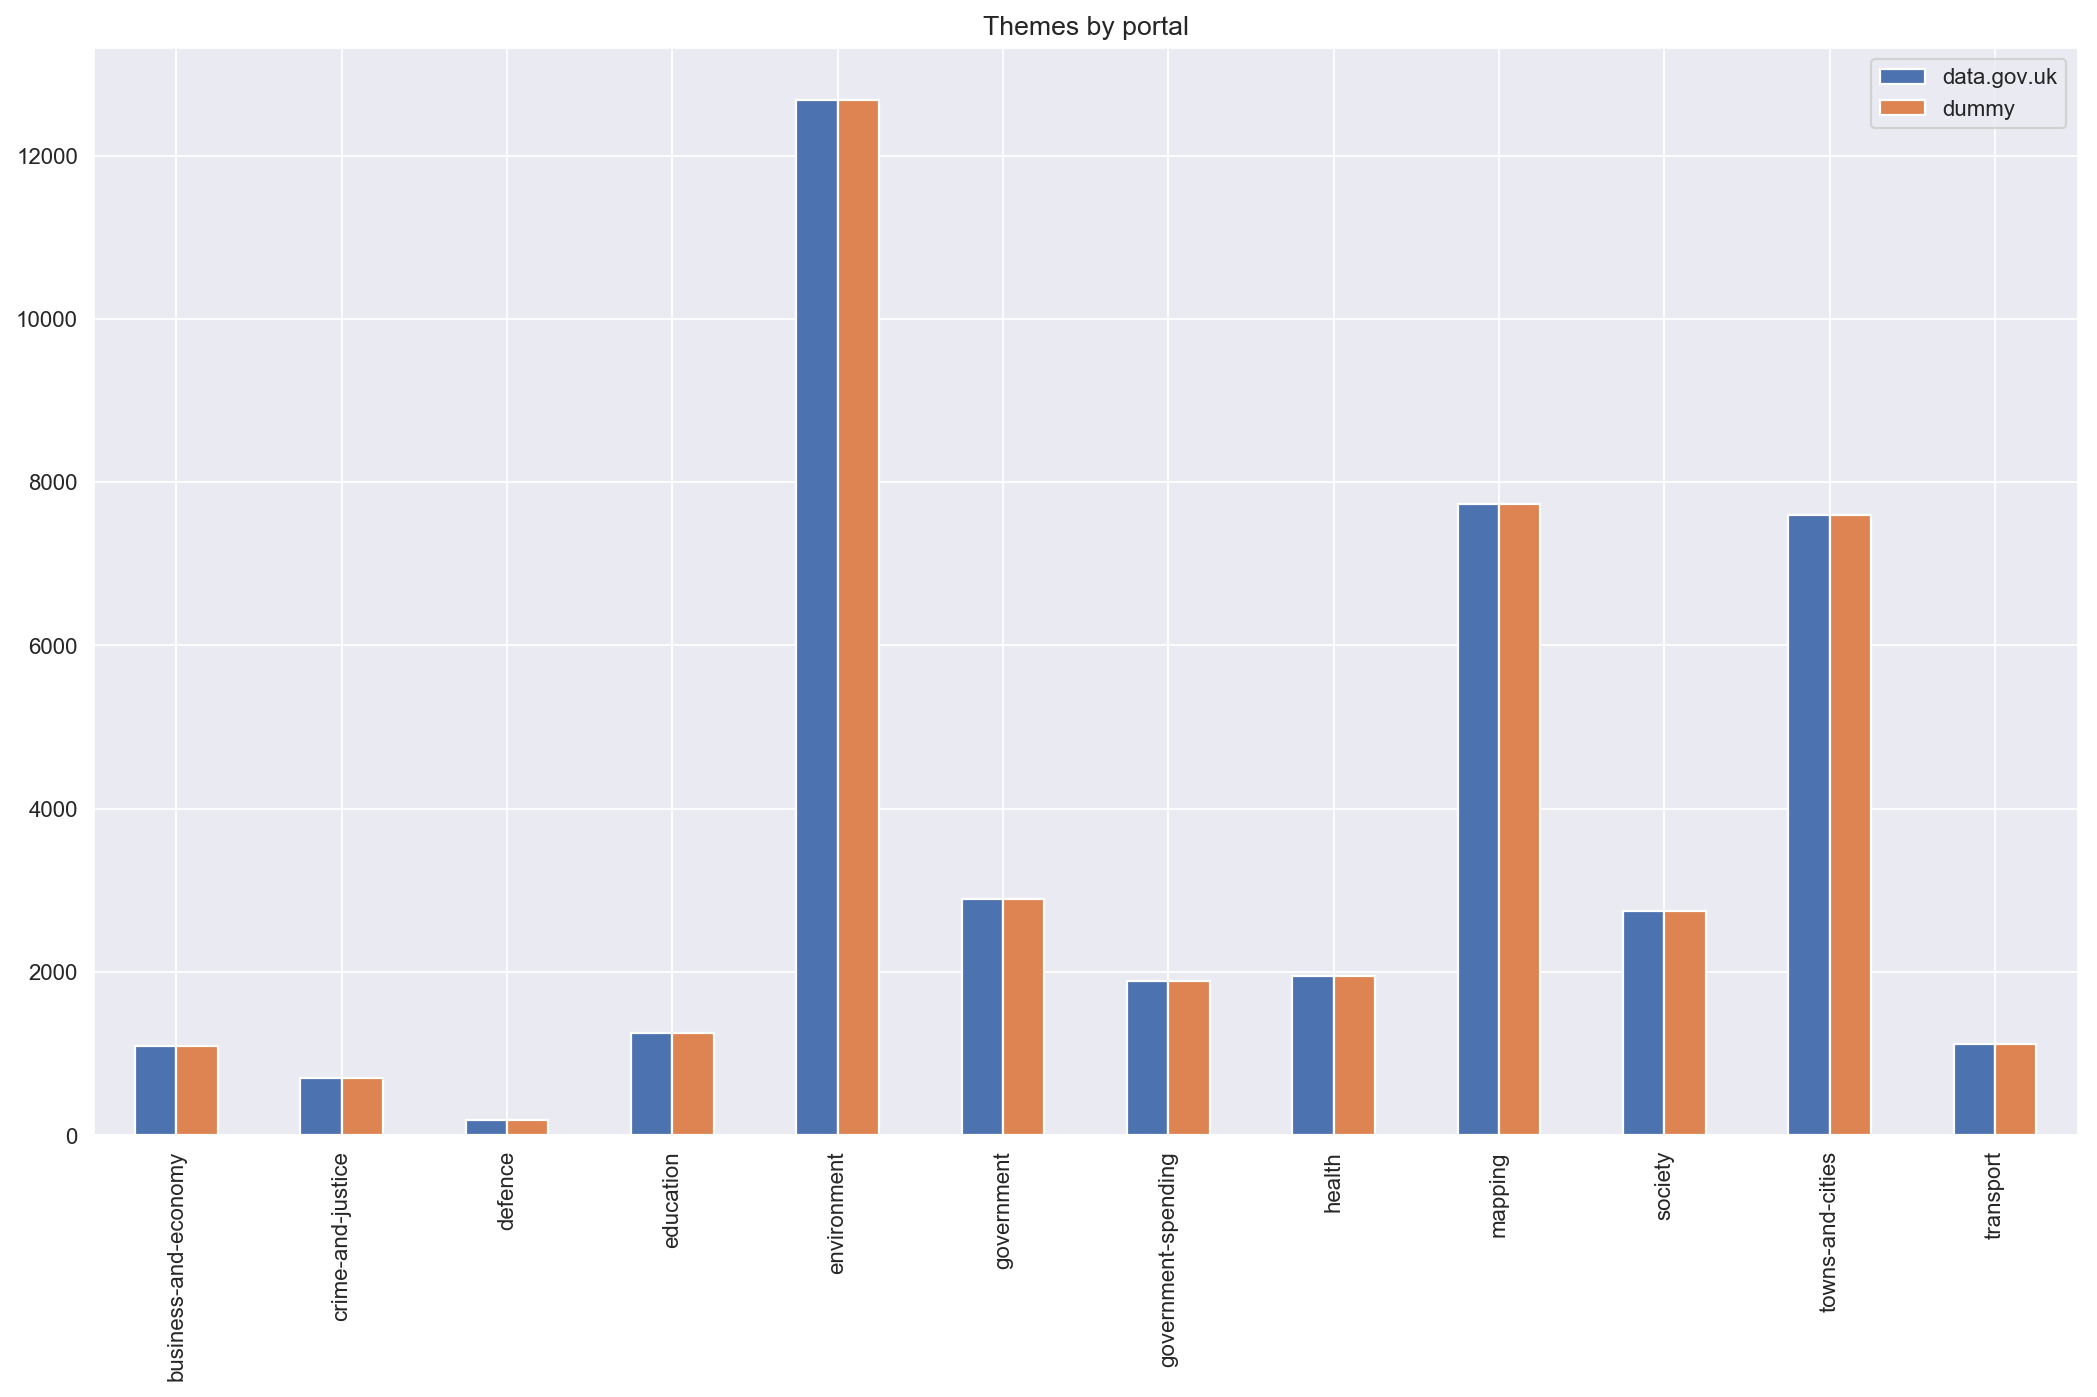

In [31]:
themes_df.plot.bar(title='Themes by portal')